DATA COMPRESSION

In [4]:
# In mnist - each image is 28 x 28 - black and white image with label on it
from keras.datasets import mnist

In [5]:
# pip install keras
# pip install tensorflow

In [6]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [9]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21 115 196 254 254 254
  156  17   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  65 203 253 253 251 248 253
  253 159   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   8 137 249 253 241 147  68  41 117
  246 253  20   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 253 242 157  29   0 

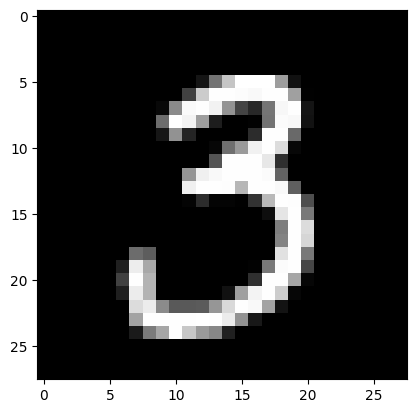

In [22]:
import matplotlib.pyplot as plt
plt.imshow(X_test[90], cmap='gray')
print(Y_test[90])
print(X_test[90])

In [18]:
X = X_test.reshape((-1, 28*28))
Y = Y_test
print(X_test.shape)
print(X.shape)
print(Y.shape)

(10000, 28, 28)
(10000, 784)
(10000,)


STEP 1 - Preprocessing

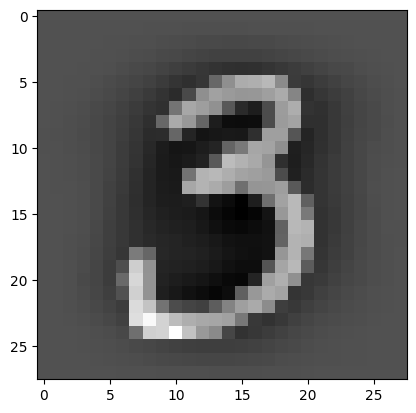

In [48]:
# pip install scikit-learn
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_ = sc.fit_transform(X) # converts all X examples into a new transformed data which with have 0 mean and 1 std
plt.imshow(X_[90].reshape((28, 28)), cmap = 'gray')

In [60]:
# Zero mean and 1 std
print(X.shape)
print(X_.shape)
print(X_[90].shape)
# print(X_[90])
print(X_[:, 90].mean())
print(X_[:, 90].std())
print(X_[:, 1].mean())
print(X_[:, 1].std())
print(X_[:, 50].mean())
print(X_[:, 50].std())
print(X_.mean(axis=0))
print(X_.mean(axis=0).shape)
print(X_.std(axis=0))
print(X_.mean(axis=0)[2])


(10000, 784)
(10000, 784)
(784,)
-7.105427357601002e-19
0.9999999999998551
0.0
0.0
0.0
0.0
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  6.25390364e-16  6.05968054e-16  7.92692995e-16
  4.95118183e-16 -7.74670605e-16  5.12228454e-16 -1.98771555e-17
  5.97412397e-16 -1.10476767e-15  8.25406410e-16  5.58986191e-16
 -8.59319560e-16  9.19263971e-16  2.75911238e-17 -1.57421264e-15
 -2.02991200e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00

Step 2 - Sklearn PCA

In [90]:
from sklearn.decomposition import PCA

# Input the paramter - how many Principal Components required in the output ??
# Note:  k principal components <= n features where each PC eigen vector kinda signifies linear comibination of all the given features 
# eigen vector which just get ONLY scaled by a lambda value but doesn't get transformed by the covariance matrix - continues to point in the same direction.
# each PC doesn't hold anything meaningful though
# Definition - 
##################################################################################################################
# The eigenvectors of a linear transform are those vectors that remain pointed in the same directions. 
# For these vectors, the effect of the transform matrix is just scalar multiplication
##################################################################################################################
pca = PCA(n_components=2) # 784 dimensions to be converted to 2 dimensions

In [91]:
Z_pca = pca.fit_transform(X_)
print(Z_pca.shape)
print(Z_pca)

(10000, 2)
[[-5.45834229  6.41389012]
 [ 2.80446733 -8.0296461 ]
 [-7.41127412 -3.86422877]
 ...
 [-5.0044062   1.1535981 ]
 [-1.42095294 -4.42351016]
 [13.14281231 -4.26197915]]


In [92]:
pca.explained_variance_
# PC1 - explains 41 percent of variance of data
# PC2 - explains 28 percent of variance of data
# - Lost 30 percent of the information though

array([41.39893397, 28.35105792])

Step 3 - Custom PCA - compute covariance

In [93]:
import numpy as np
covar = np.dot(X_.T, X_)
covar.shape

(784, 784)

Step 4 - Compute eigen vectors using SVD

In [94]:
from numpy.linalg import svd

U, S, V = svd(covar)
# U return n Principal components
U.shape

(784, 784)

In [95]:
Ureduced = U[:, :2]
Ureduced.shape
# shape is 784 original dimensions, 2 Eigen vectors(2 PCs)

(784, 2)

Step 5 - Projection of data on new axis(principal components) 

In [96]:
Z = np.dot(X_, Ureduced)
Z.shape

(10000, 2)

In [97]:
Z

array([[  5.45831116,   6.41400668],
       [ -2.80443233,  -8.02885014],
       [  7.41124146,  -3.86404387],
       ...,
       [  5.00435204,   1.15364641],
       [  1.42085442,  -4.42308066],
       [-13.14268302,  -4.26280299]])

- Custom PCA output in Z is very similar to the one we got from sklearn Z_pca. 
- Custom PCA output is mirror image of sklearn PCA output
- Just the direction is different - Axis is still the same.

Step 6 - Visualize Data set

In [98]:
import pandas as pd
new_dataset = np.hstack((Z, Y.reshape(-1, 1)))
dataframe = pd.DataFrame(new_dataset, columns=['PC1', 'PC2', 'label'])
dataframe.head()

,PC1,PC2,label
0,5.458311,6.414007,7.0
1,-2.804432,-8.028850,2.0
2,7.411241,-3.864044,1.0
3,-8.751242,0.045991,0.0
4,0.065756,6.296290,4.0


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

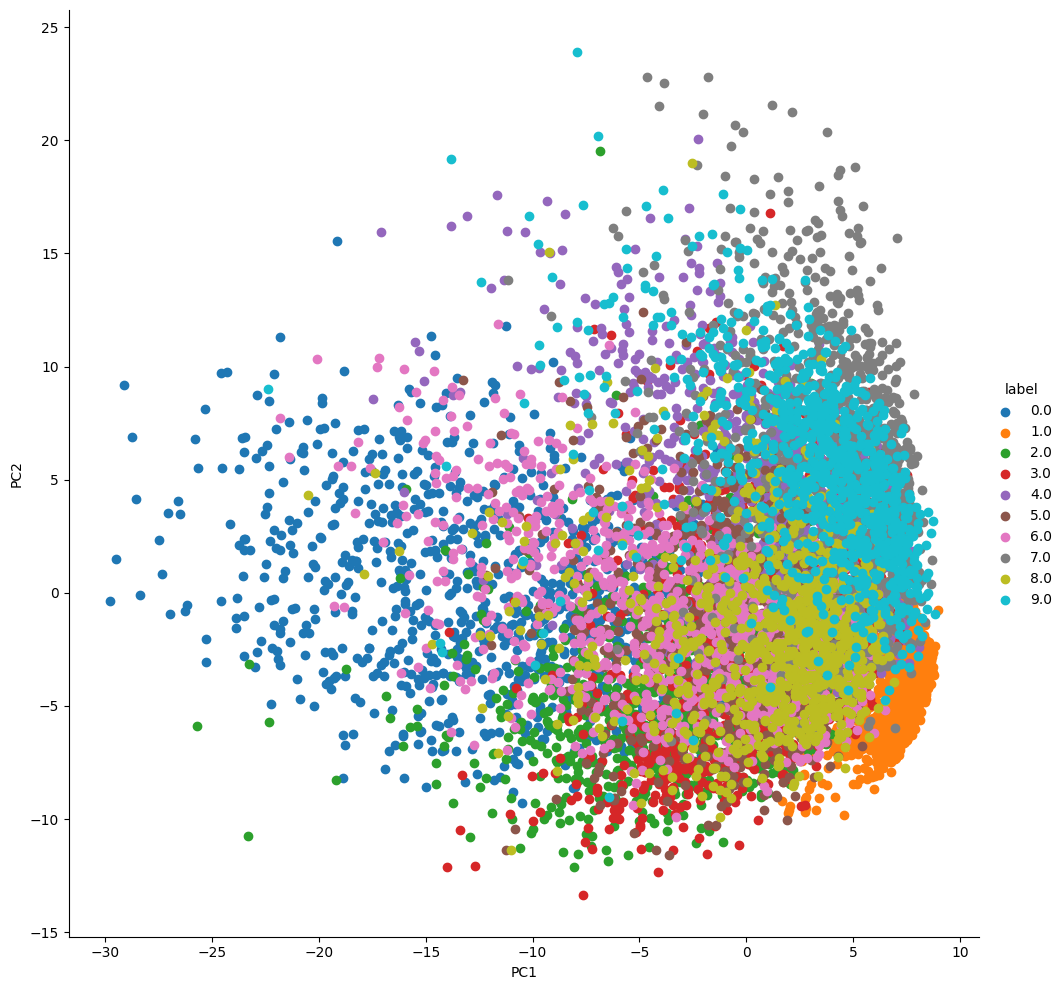

In [99]:
import seaborn as sns
plt.figure(figsize=(15, 15))
fg = sns.FacetGrid(dataframe, hue='label', height=10)
fg.map(plt.scatter, 'PC1', 'PC2')
fg.add_legend()
plt.show()
# Whole mnist data below is converted into 2D graph as shown below - 
# also note that - We getting so much noise because we converted from 784 dimensions to 2 dimensions and lost 30 percent of the information in doing that.

Step 7 - PCA with 784

In [105]:
pca_with_784 = PCA()
Z_pca=pca_with_784.fit_transform(X_) # X_ is our preprocessed data
Z_pca.shape # 784 Principal Components

(10000, 784)

In [108]:
print(pca.explained_variance_)
print(pca_with_784.explained_variance_)
# 1st dimension explains 41 percent of variance
# 2nd dimension explains 28 percent of variance
# 3rd dimension explains 27 percent of variance
# 4th dimension explains 21 percent of variance
# and so on - importance keeps on reducing - so not relevant to keep all the PCs

[41.39893397 28.35105792]
[4.13989340e+01 2.83510581e+01 2.70196465e+01 2.15824995e+01
 1.84057252e+01 1.60945634e+01 1.36639090e+01 1.25807315e+01
 1.11624006e+01 1.01380790e+01 9.83450164e+00 8.75790204e+00
 8.38544770e+00 7.97784570e+00 7.64886637e+00 7.31512409e+00
 6.89333872e+00 6.64082579e+00 6.32396933e+00 6.08974669e+00
 5.94234357e+00 5.78338241e+00 5.65926201e+00 5.48906732e+00
 5.25427495e+00 5.14680013e+00 5.05462485e+00 4.89770948e+00
 4.73536524e+00 4.56603235e+00 4.46677346e+00 4.37046128e+00
 4.32323658e+00 4.15557409e+00 4.03609421e+00 3.95423005e+00
 3.88875015e+00 3.82939953e+00 3.77880871e+00 3.69226086e+00
 3.68222396e+00 3.66141824e+00 3.56686939e+00 3.47145867e+00
 3.42387456e+00 3.33512759e+00 3.32686280e+00 3.26786201e+00
 3.19850249e+00 3.13279782e+00 3.07617536e+00 3.03401082e+00
 2.97856834e+00 2.94000449e+00 2.89943744e+00 2.83019996e+00
 2.80306845e+00 2.76761484e+00 2.74981888e+00 2.70984991e+00
 2.67663139e+00 2.58228202e+00 2.54698454e+00 2.50771929e+0

In [111]:
print(pca_with_784.explained_variance_ratio_)

[6.19682546e-02 4.24374595e-02 4.04445278e-02 3.23059001e-02
 2.75507255e-02 2.40912485e-02 2.04529082e-02 1.88315470e-02
 1.67085095e-02 1.51752473e-02 1.47208356e-02 1.31093207e-02
 1.25518101e-02 1.19416885e-02 1.14492537e-02 1.09496895e-02
 1.03183374e-02 9.94036184e-03 9.46607325e-03 9.11547562e-03
 8.89483433e-03 8.65689233e-03 8.47110191e-03 8.21634492e-03
 7.86489450e-03 7.70402013e-03 7.56604698e-03 7.33116722e-03
 7.08816124e-03 6.83469424e-03 6.68611794e-03 6.54195245e-03
 6.47126385e-03 6.22029721e-03 6.04145299e-03 5.91891411e-03
 5.82090011e-03 5.73206076e-03 5.65633358e-03 5.52678388e-03
 5.51176009e-03 5.48061691e-03 5.33909088e-03 5.19627473e-03
 5.12504816e-03 4.99220670e-03 4.97983549e-03 4.89151980e-03
 4.78769856e-03 4.68934811e-03 4.60459243e-03 4.54147817e-03
 4.45848874e-03 4.40076420e-03 4.34004117e-03 4.23640261e-03
 4.19579063e-03 4.14272167e-03 4.11608368e-03 4.05625587e-03
 4.00653252e-03 3.86530508e-03 3.81246982e-03 3.75369538e-03
 3.66448615e-03 3.610929

In [112]:

print(pca_with_784.explained_variance_ / np.sum(pca_with_784.explained_variance_))

[6.19682546e-02 4.24374595e-02 4.04445278e-02 3.23059001e-02
 2.75507255e-02 2.40912485e-02 2.04529082e-02 1.88315470e-02
 1.67085095e-02 1.51752473e-02 1.47208356e-02 1.31093207e-02
 1.25518101e-02 1.19416885e-02 1.14492537e-02 1.09496895e-02
 1.03183374e-02 9.94036184e-03 9.46607325e-03 9.11547562e-03
 8.89483433e-03 8.65689233e-03 8.47110191e-03 8.21634492e-03
 7.86489450e-03 7.70402013e-03 7.56604698e-03 7.33116722e-03
 7.08816124e-03 6.83469424e-03 6.68611794e-03 6.54195245e-03
 6.47126385e-03 6.22029721e-03 6.04145299e-03 5.91891411e-03
 5.82090011e-03 5.73206076e-03 5.65633358e-03 5.52678388e-03
 5.51176009e-03 5.48061691e-03 5.33909088e-03 5.19627473e-03
 5.12504816e-03 4.99220670e-03 4.97983549e-03 4.89151980e-03
 4.78769856e-03 4.68934811e-03 4.60459243e-03 4.54147817e-03
 4.45848874e-03 4.40076420e-03 4.34004117e-03 4.23640261e-03
 4.19579063e-03 4.14272167e-03 4.11608368e-03 4.05625587e-03
 4.00653252e-03 3.86530508e-03 3.81246982e-03 3.75369538e-03
 3.66448615e-03 3.610929

In [114]:
cum_var_explained = np.cumsum(pca_with_784.explained_variance_ratio_)
cum_var_explained
# Upto 1st PC explains real 6% of variance
# Upto 2nd PC explains real 10% of variance
# Upto kth PC explains real 80-90% of variance
# when we reach 100 % variance in this output, we can stop at that PC.

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

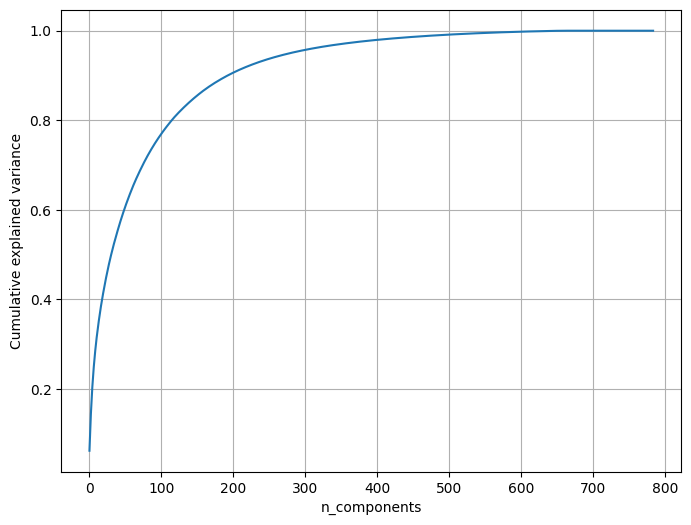

In [116]:
plt.figure(figsize=(8,6))
plt.plot(cum_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("Cumulative explained variance")
plt.show()


# if you require 90 percent of variance, take 200 PCs
# if you require 95 percent of variance, take 300 PCs
# This also reduce cpu memory load and make algorithm faster.